In [1]:
import underworld as uw
from underworld import function as fn
#import UWGeodynamics as GEO
#from underworld.scaling import units as u
#from underworld.scaling import dimensionalise, non_dimensionalise
import math
import numpy as np
from scipy.ndimage import interpolation
import underworld.visualisation as glucifer
#import glucifer
import os
import matplotlib.pyplot as pyplot
from cycler import cycler

rank = uw.mpi.rank

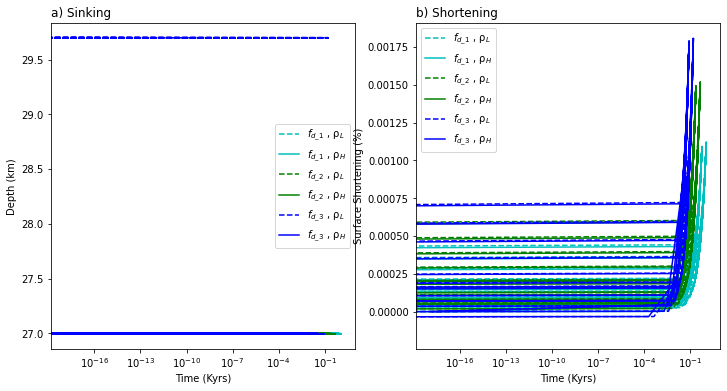

In [2]:
#This script takes data from six separate model runs and charts them together by extracting the 
#data from several output .txt files and then placing them into large data arrays. If the size of the 
#model runs disagrees (ie. one model is run for longer than the others), it is able to interpolate
#the results of the shorter runs into arrays of the same length as the longest model run.

SizeFix = np.array([ 1, 1, 1, 1, 1, 1])

Batch = 10
nTrials = 6
nsteps = 160
inputPath = 'IceDripDataBatch'+str(Batch)+'/Trial'
outputPath = 'IceDripDataBatch'+str(Batch)+'/'

tTracer = np.empty([nsteps, nTrials])
yTracer = np.empty([nsteps, nTrials])
xTracer = np.empty([nsteps, nTrials])
sTracer = np.empty([nsteps, nTrials])
#STracer = np.empty([nsteps, nTrials])

    

for i in range(1,(nTrials+1)):
    if SizeFix[i-1] == 1:        
        Tempt = np.loadtxt(inputPath + str(i) + 'TimeTracer.txt')
        Tempt = interpolation.zoom(Tempt,nsteps/len(Tempt))
        np.savetxt(inputPath + str(i) + 'TimeTracer.txt',Tempt)
        Tempy = np.loadtxt(inputPath + str(i) + 'yTracer.txt') 
        Tempy = interpolation.zoom(Tempy,nsteps/len(Tempy)) 
        np.savetxt(inputPath + str(i) + 'yTracer.txt',Tempy)
        Tempx = np.loadtxt(inputPath + str(i) + 'xTracer.txt')
        Tempx = interpolation.zoom(Tempx,nsteps/len(Tempx))
        np.savetxt(inputPath + str(i) + 'xTracer.txt',Tempx)
        Temps = np.loadtxt(inputPath + str(i) + 'x2Shortening.txt')
        Temps = interpolation.zoom(Temps,nsteps/len(Temps)) 
        np.savetxt(inputPath + str(i) + 'x2Shortening.txt',Temps)

for i in range(1,(nTrials+1)):
    tTracer[:,(i-1)] = np.loadtxt(inputPath + str(i) + 'TimeTracer.txt')
    yTracer[:,(i-1)] = np.loadtxt(inputPath + str(i) + 'yTracer.txt')
    xTracer[:,(i-1)] = np.loadtxt(inputPath + str(i) + 'xTracer.txt')
    sTracer[:,(i-1)] = np.loadtxt(inputPath + str(i) + 'x2Shortening.txt')
    #STracer[:,(i-1)] = np.loadtxt(inputPath + str(i) + 'Stress.txt')

    
stylecycle = (cycler(linestyle = ['--','-','--','-','--','-']) +
             cycler(color = ['c','c','g','g','b','b']))


Figure = pyplot.figure()
Figure.set_size_inches(12,6)
ax1 = Figure.add_subplot(1,2,1)
ax1.set_prop_cycle(stylecycle)
#ax1.plot(tTracer, yTracer)
ax1.semilogx(tTracer, yTracer)
ax1.set_title('a) Sinking',loc = 'left')
ax1.set_xlabel('Time (Kyrs)')
ax1.set_ylabel('Depth (km)')
ax1.legend(['$f_{d\_1}$ , '+chr(961)+'$_L$',
            '$f_{d\_1}$ , '+chr(961)+'$_H$',
            '$f_{d\_2}$ , '+chr(961)+'$_L$',
            '$f_{d\_2}$ , '+chr(961)+'$_H$',
            '$f_{d\_3}$ , '+chr(961)+'$_L$',
            '$f_{d\_3}$ , '+chr(961)+'$_H$'])

#ax2 = Figure.add_subplot(1,3,2)
#ax2.set_prop_cycle(stylecycle)
#ax2.plot(tTracer, xTracer)
#ax2.semilogx(tTracer, xTracer)
#ax2.set_ylabel('Surface Compression (km)')
#ax2.legend(['10x; 50%','10x; 100%','100x; 50%','100x; 100%','1000x; 50%','1000x, 100%'])

ax3 = Figure.add_subplot(1,2,2)
ax3.set_prop_cycle(stylecycle)
#ax3.plot(tTracer, sTracer)
ax3.semilogx(tTracer, sTracer)
ax3.set_title('b) Shortening', loc = 'left')
ax3.set_xlabel('Time (Kyrs)')
ax3.set_ylabel('Surface Shortening (%)')
ax3.legend(['$f_{d\_1}$ , '+chr(961)+'$_L$',
            '$f_{d\_1}$ , '+chr(961)+'$_H$',
            '$f_{d\_2}$ , '+chr(961)+'$_L$',
            '$f_{d\_2}$ , '+chr(961)+'$_H$',
            '$f_{d\_3}$ , '+chr(961)+'$_L$',
            '$f_{d\_3}$ , '+chr(961)+'$_H$'])

#ax4 = Figure.add_subplot(1,3,3)
#ax4.set_prop_cycle(stylecycle)
#ax3.plot(tTracer, sTracer)
#ax4.semilogx(tTracer, STracer)
#ax4.set_xlabel('Time (Kyrs)')
#ax4.set_ylabel('Maximum Stress (MPa)')
#ax4.legend(['10x; 50%','10x; 100%','100x; 50%','100x; 100%','1000x; 50%','1000x, 100%'])

Figure.savefig(outputPath + 'BigFig.png')